In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv


In [2]:
%config Completer.use_jedi = False

**Importing Libraries**

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 
import matplotlib as mpl
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
print(plt.style.available)
mpl.style.use(['ggplot'])

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


**Data Processing**

In [4]:
df = pd.read_csv('/kaggle/input/customer-shopping-dataset/customer_shopping_data.csv')

In [5]:
# Let's check the first five data of the dataset
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


# 1. Check for missing values in the dataset

In [6]:
#Check for missing values in the dataset and handle them accordingly.
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [7]:
# let's check the data type for each column
df.dtypes

invoice_no         object
customer_id        object
gender             object
age                 int64
category           object
quantity            int64
price             float64
payment_method     object
invoice_date       object
shopping_mall      object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [9]:
df.info

<bound method DataFrame.info of       invoice_no customer_id  gender  age         category  quantity    price  \
0        I138884     C241288  Female   28         Clothing         5  1500.40   
1        I317333     C111565    Male   21            Shoes         3  1800.51   
2        I127801     C266599    Male   20         Clothing         1   300.08   
3        I173702     C988172  Female   66            Shoes         5  3000.85   
4        I337046     C189076  Female   53            Books         4    60.60   
...          ...         ...     ...  ...              ...       ...      ...   
99452    I219422     C441542  Female   45         Souvenir         5    58.65   
99453    I325143     C569580    Male   27  Food & Beverage         2    10.46   
99454    I824010     C103292    Male   63  Food & Beverage         2    10.46   
99455    I702964     C800631    Male   56       Technology         4  4200.00   
99456    I232867     C273973  Female   36         Souvenir         3    35.19

In [10]:
# Let's create new column for each transaction of sales

df['sales'] = df['quantity'] * df['price'] # Create a sales column
df['sales']

0         7502.00
1         5401.53
2          300.08
3        15004.25
4          242.40
           ...   
99452      293.25
99453       20.92
99454       20.92
99455    16800.00
99456      105.57
Name: sales, Length: 99457, dtype: float64

In [11]:
# let's check how much shopping mall in the dataset
print(set(df['shopping_mall'].unique()))

print("How much shopping mall in dataset?")

print( len(set(df['shopping_mall'].unique())) )

{'Kanyon', 'Zorlu Center', 'Metrocity', 'Istinye Park', 'Metropol AVM', 'Emaar Square Mall', 'Viaport Outlet', 'Cevahir AVM', 'Forum Istanbul', 'Mall of Istanbul'}
How much shopping mall in dataset?
10


In [12]:
# Let's parsing the dates of invoice to datetime using pandas

df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst = True)

print(df['invoice_date'])

0       2022-08-05
1       2021-12-12
2       2021-11-09
3       2021-05-16
4       2021-10-24
           ...    
99452   2022-09-21
99453   2021-09-22
99454   2021-03-28
99455   2021-03-16
99456   2022-10-15
Name: invoice_date, Length: 99457, dtype: datetime64[ns]


In [13]:
# Let's create column for each month,year, and day of week
df['year']= df['invoice_date'].dt.year

df['month']= df['invoice_date'].dt.month

df['day']= df['invoice_date'].dt.day
df['weekday']= df['invoice_date'].dt.weekday

dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df['dayofweek']= df['invoice_date'].dt.weekday.map(dw_mapping)

In [14]:
df['dayofweek'].head()

0     Friday
1     Sunday
2    Tuesday
3     Sunday
4     Sunday
Name: dayofweek, dtype: object

# 2. Explore the distribution of categorical variables
# 2.1. Gender Structure for Number of buyers

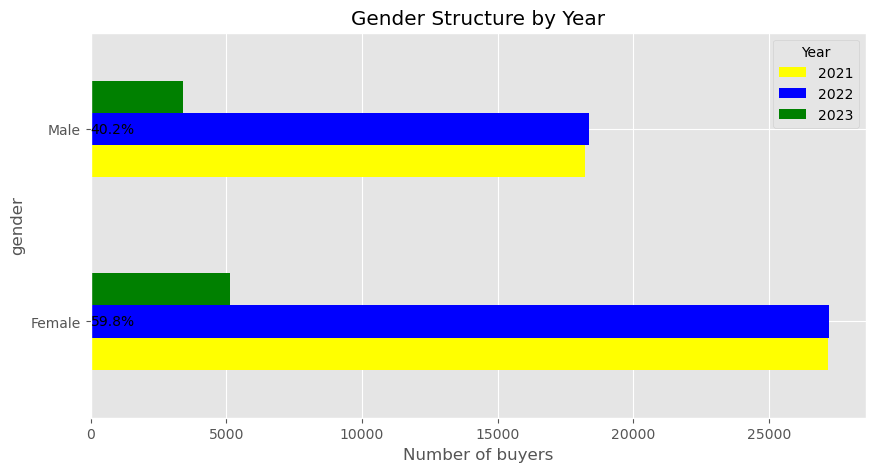

In [15]:
df_gender_year = df.groupby(['gender', 'year'])['customer_id'].nunique().unstack()

# Plot the gender structure with years
ax = df_gender_year.plot(kind='barh', figsize=(10,5), color=['yellow', 'blue', 'green'])
ax.set_xlabel("Number of buyers")
ax.set_title("Gender Structure by Year")
ax.legend(title='Year', labels=['2021', '2022', '2023'])

# Add percentage values to each bar
for i, v in enumerate(df['gender'].value_counts(normalize=True)):
    ax.text(v, i, f'{v:.1%}', color='black', va='center')
    
plt.show()


# 2.1. Category Structure

Text(0.5, 1.0, 'Distribution of purchases by category')

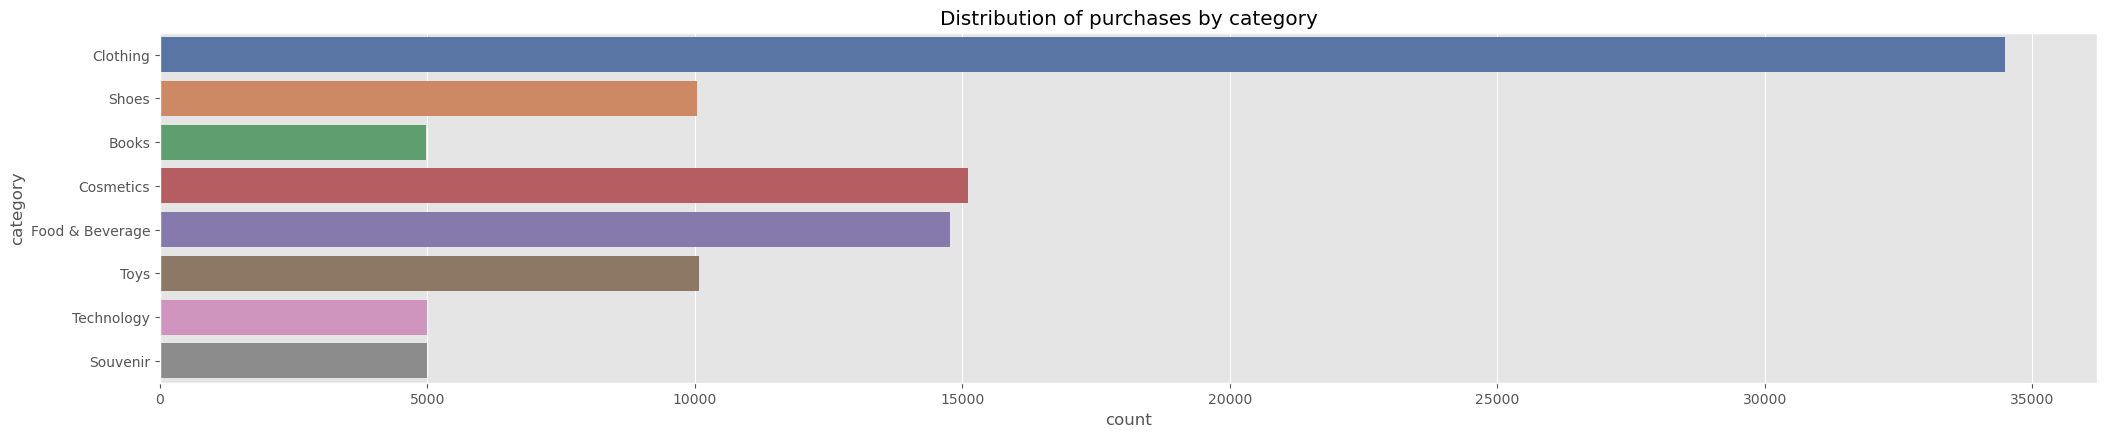

In [16]:
fig = plt.figure(figsize=(25,10))

# Let's see the most item categories that has been purchased
ax1 = fig.add_subplot(212)

sns.countplot(df,y='category',palette='deep')
ax1.set_title('Distribution of purchases by category')

# 2.2. Payment Structure

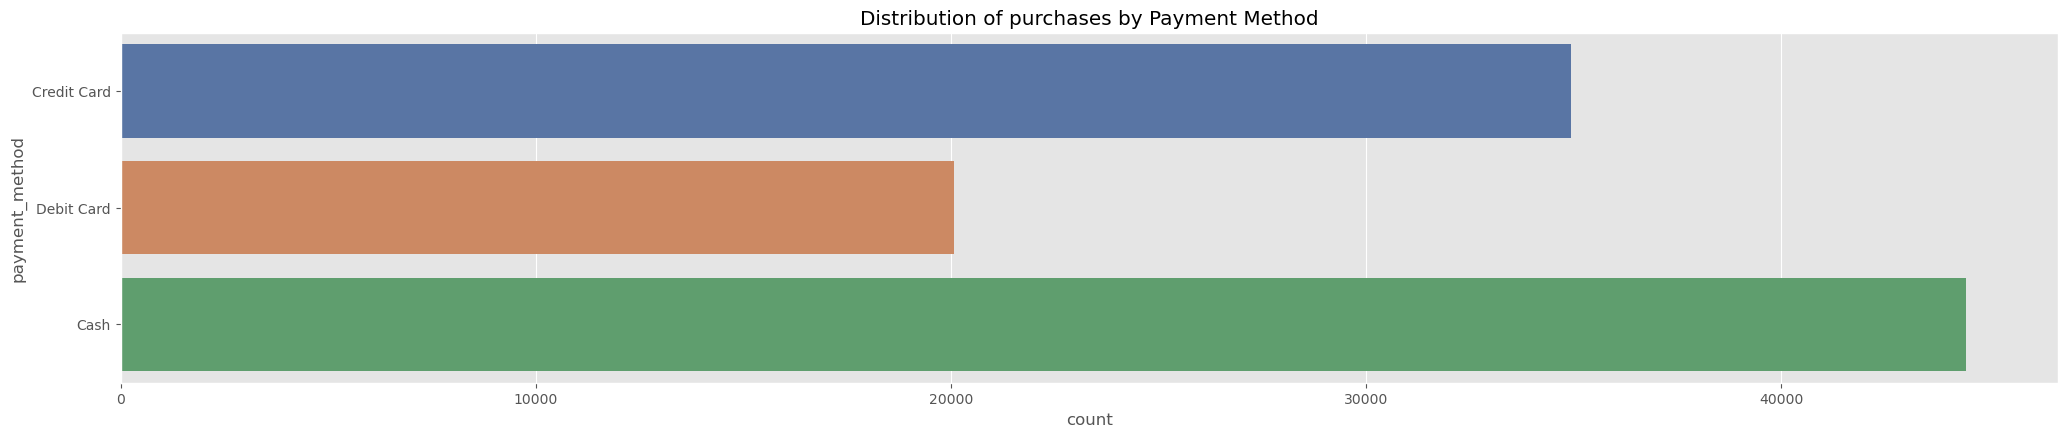

In [17]:
fig = plt.figure(figsize=(25,10))

# Let's see the most item categories that has been purchased
ax1 = fig.add_subplot(212)

sns.countplot(df,y='payment_method',palette='deep')

ax1.set_title('Distribution of purchases by Payment Method')

plt.show()


# 2.3. Shopping Mall Revenue Distribution

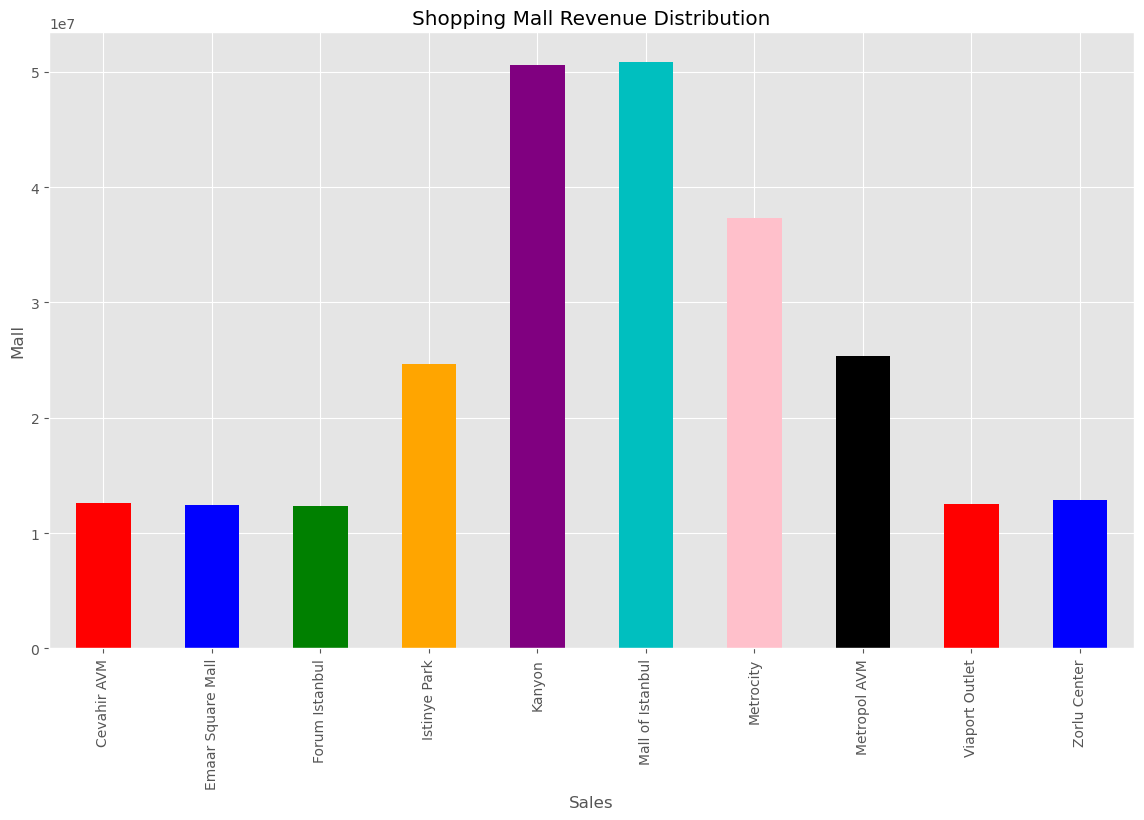

In [18]:
# Let's see which the most sales shopping mall
colors = ['red', 'blue', 'green', 'orange', 'purple','c' ,'pink', 'k']
df_mall = df.groupby("shopping_mall")["sales"].sum()
df_mall.plot(kind="bar",figsize=(14, 8),color=colors)

plt.title('Shopping Mall Revenue Distribution')
plt.xlabel('Sales')
plt.ylabel('Mall')
plt.show()

# 2.4. Mean Spending by Age Group

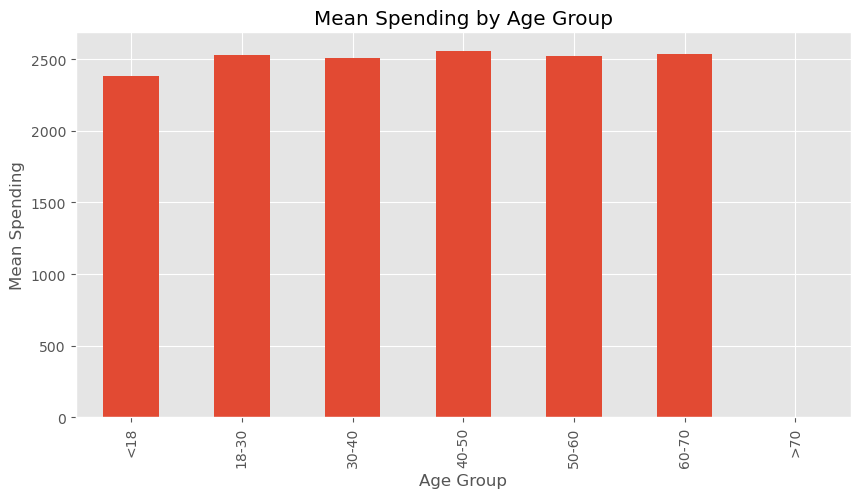

In [19]:
age_bins = [0, 18, 30, 40, 50, 60, 70, 120]
age_labels = ['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '>70' ]
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

# group customers by age group
grouped = df.groupby('age_group')

# calculate mean spending for each age group
mean_spending = grouped['sales'].mean()

# plot mean spending by age group
mean_spending.plot(kind='bar', figsize=(10,5))
plt.xlabel('Age Group')
plt.ylabel('Mean Spending')
plt.title('Mean Spending by Age Group')
plt.show()

# 3. Summary statistics 

In [20]:
# Calculate summary statistics such as mean, median and standard deviation for numerical variables such as age, quantity and price
# By calling describe() on df, the code prints a table
#of statistics to the console that includes
#the count, mean, standard deviation, minimum value, 25th percentile, median, 75th percentile, and maximum value for each column in the DataFrame.
df.describe()

,age,quantity,price,sales,year,month,day,weekday
count,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321,2528.789268,2021.629408,6.113898,15.569603,2.993022
std,14.990054,1.413025,941.184567,4222.475781,0.636136,3.569511,8.799894,2.001752
min,18.000000,1.000000,5.230000,5.230000,2021.000000,1.000000,1.000000,0.000000
25%,30.000000,2.000000,45.450000,136.350000,2021.000000,3.000000,8.000000,1.000000
50%,43.000000,3.000000,203.300000,600.170000,2022.000000,6.000000,16.000000,3.000000
75%,56.000000,4.000000,1200.320000,2700.720000,2022.000000,9.000000,23.000000,5.000000
max,69.000000,5.000000,5250.000000,26250.000000,2023.000000,12.000000,31.000000,6.000000


# 4. Visualize the distribution of numerical variables using histograms and box plots to identify any outliers or skewed distributions.

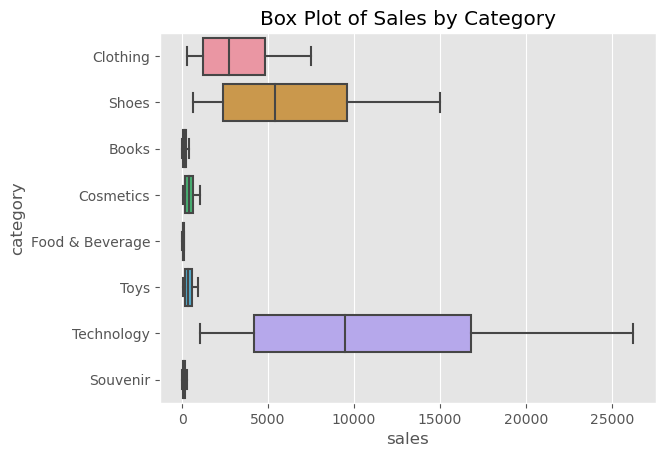

In [21]:
sns.boxplot(x='sales', y='category', data=df)
plt.title('Box Plot of Sales by Category')
plt.show()

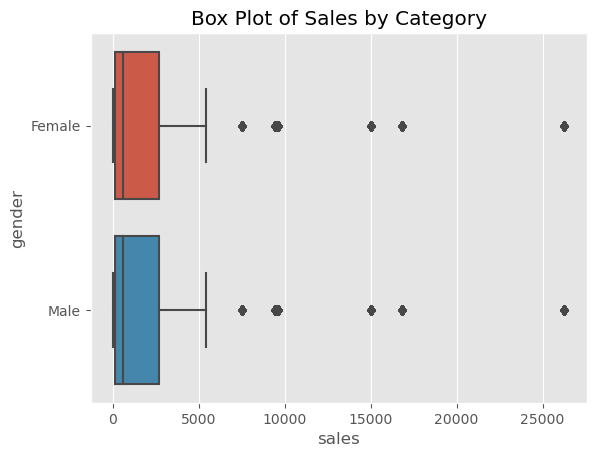

In [22]:
import seaborn as sns

sns.boxplot(x='sales', y='gender', data=df)
plt.title('Box Plot of Sales by Category')
plt.show()

# 5. Analyze the correlation between different variables using scatter plots and correlation matrices

In [23]:
df_corr = df.corr() # Generate correlation matrix
df_corr

,age,quantity,price,sales,year,month,day,weekday
age,1.000000,0.000667,0.001694,0.002731,-0.002390,0.006048,0.008174,-0.000845
quantity,0.000667,1.000000,0.344880,0.461173,0.000821,0.002731,0.000491,-0.009892
price,0.001694,0.344880,1.000000,0.962372,-0.000831,0.001055,-0.000336,-0.005702
sales,0.002731,0.461173,0.962372,1.000000,0.000576,0.001771,-0.001080,-0.006128
year,-0.002390,0.000821,-0.000831,0.000576,1.000000,-0.255479,-0.036800,-0.003144
month,0.006048,0.002731,0.001055,0.001771,-0.255479,1.000000,0.019972,0.000007
day,0.008174,0.000491,-0.000336,-0.001080,-0.036800,0.019972,1.000000,-0.003255
weekday,-0.000845,-0.009892,-0.005702,-0.006128,-0.003144,0.000007,-0.003255,1.000000


<AxesSubplot:>

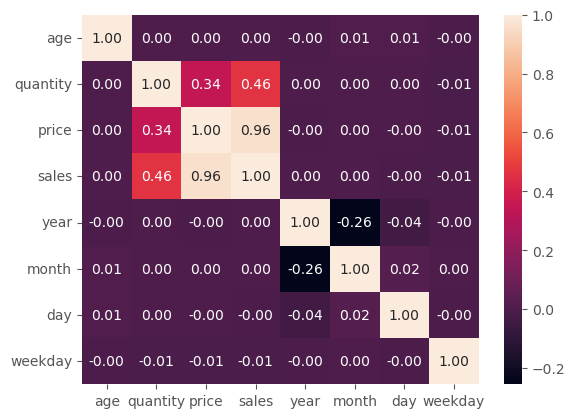

In [24]:
sns.heatmap(df_corr,  fmt=".2f",annot=True)

# 6. Key commercial metrics
# 6.1. Average transaction value (ATV) for Malls and ATL per Months for each Mall

In [25]:
atl_df = df.groupby('shopping_mall').agg(total_revenue=('sales','sum' ), transactions=('invoice_no', 'count'))

atl_df['ATL'] = atl_df['total_revenue'] / atl_df['transactions']

print(atl_df[['ATL']])

                           ATL
shopping_mall                 
Cevahir AVM        2533.588099
Emaar Square Mall  2578.694718
Forum Istanbul     2487.148017
Istinye Park       2517.005181
Kanyon             2550.281547
Mall of Istanbul   2550.894132
Metrocity          2485.030133
Metropol AVM       2497.777108
Viaport Outlet     2548.095181
Zorlu Center       2542.079570


In [26]:
# ATL per Months for each Mall
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['month'] = df['invoice_date'].dt.month

df_grouped = df.groupby(['shopping_mall', 'month']).agg(total_sales=('sales', 'sum'), total_transactions=('invoice_no', 'nunique'))
df_grouped['ATL'] = df_grouped['total_sales'] / df_grouped['total_transactions']

print(df_grouped)# ATL per Months for each Mall
df['invoice_date'] = pd.to_datetime(df['invoice_date'], dayfirst=True)
df['month'] = df['invoice_date'].dt.month

df_grouped = df.groupby(['shopping_mall', 'month']).agg(total_sales=('sales', 'sum'), total_transactions=('invoice_no', 'nunique'))
df_grouped['ATL'] = df_grouped['total_sales'] / df_grouped['total_transactions']

print(df_grouped, round(df_grouped, 2))



                     total_sales  total_transactions          ATL
shopping_mall month                                              
Cevahir AVM   1       1380960.20                 584  2364.657877
              2       1321839.17                 480  2753.831604
              3       1071254.28                 453  2364.799735
              4        838467.02                 372  2253.943602
              5       1051819.79                 414  2540.627512
...                          ...                 ...          ...
Zorlu Center  8        946997.11                 362  2616.014116
              9       1028648.89                 401  2565.209202
              10       900811.17                 387  2327.677442
              11       962483.81                 389  2474.251440
              12       996584.26                 416  2395.635240

[120 rows x 3 columns]
                     total_sales  total_transactions          ATL
shopping_mall month                                 

# 6.2 Revenue per months

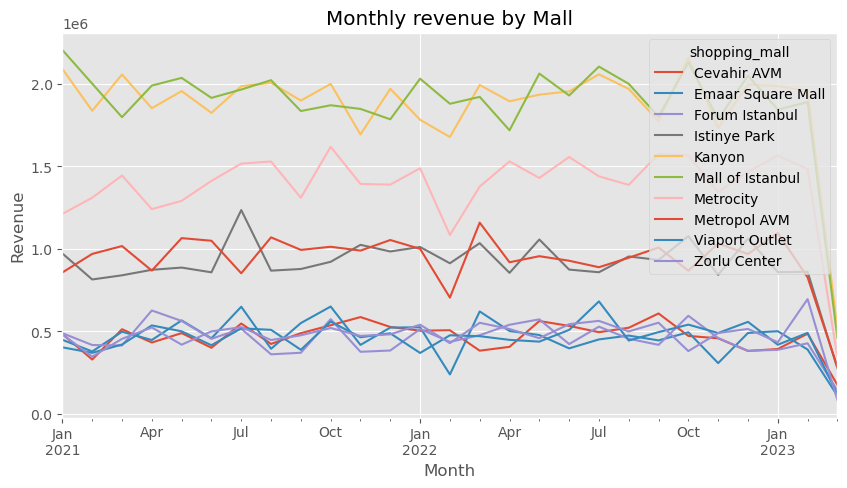

In [27]:
# Convert invoice_date to datetime and set as index
df['invoice_date'] = pd.to_datetime(df['invoice_date'])
df.set_index('invoice_date', inplace=True)

# Create revenue column
df['revenue'] = df['quantity'] * df['price']

# Group by shopping_mall and month
mall_revenue = df.groupby(['shopping_mall', pd.Grouper(freq='M')])['revenue'].sum()

# Reset index to convert month back to a column
mall_revenue = mall_revenue.reset_index()

# Pivot the data to create columns for each mall
mall_revenue = mall_revenue.pivot(index='invoice_date', columns='shopping_mall', values='revenue')

# Plot the data
mall_revenue.plot(figsize=(10, 5))
plt.title('Monthly revenue by Mall')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()

# 6.3. Average basket size
Average basket size = total number of units sold/total number of transactions

Average Basket Size: 3.003428617392441
shopping_mall
Cevahir AVM          2.995191
Emaar Square Mall    3.014134
Forum Istanbul       3.002224
Istinye Park         3.012473
Kanyon               2.999395
Mall of Istanbul     3.014291
Metrocity            2.990740
Metropol AVM         3.004626
Viaport Outlet       2.994709
Zorlu Center         3.001773
Name: quantity, dtype: float64


<AxesSubplot:xlabel='month', ylabel='shopping_mall'>

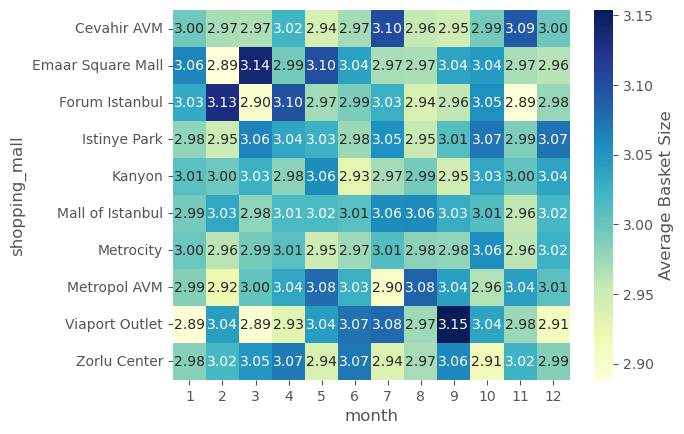

In [28]:
# Average basket size
total_items_sold = df['quantity'].sum()
total_transactions = df['invoice_no'].nunique()
avg_basket_size = total_items_sold / total_transactions
print("Average Basket Size:", avg_basket_size)

avg_basket_size = df.groupby('shopping_mall')['quantity'].mean()
print(avg_basket_size)

# Create pivot table with average basket size for each mall and month
pivot_df = pd.pivot_table(df, values='quantity', index='shopping_mall', columns='month', aggfunc='mean')

# Create heatmap to visualize the values
sns.heatmap(pivot_df, cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average Basket Size'})

# 6.4. Customer Lifetime Value (CLV)
CLV = (Average Purchase Value x Number of Repeat Purchases x Average Customer Lifespan)
Average Purchase Value is the average amount of money spent by a customer per transaction
Number of Repeat Purchases is the number of times a customer makes a purchase
Average Customer Lifespan is the average length of time a customer remains active with the business

For example, if a customer makes an average purchase of EUR 50, makes 4 purchases per year, and remains active for an average of 5 years, the CLV would be:

**CLV = EUR 50 x 4 x 5 = EUR 1,000**

In [29]:
# calculate average purchase value
avg_purchase_value = df['price'].mean()
print('Average purchase price: $', round(avg_purchase_value, 2))

# calculate number of repeat purchases. In this data set all invoice_id and customer_id are unique. 
#repeat_purchases = df ['invoice_id'].count()/ df['customer_id'].count()
repeat_purchases = 1
                    
print('Repeated Purchases:', round(repeat_purchases, 2))

# calculate average customer lifespan (in months) This data presented since May 2021 to Feb 2023. 5+12+2 = 19 Months = 1,5 Year
avg_lifespan = 1.5
print('Lifespan: Years', round(avg_lifespan, 2))

# calculate CLV
CLV = avg_purchase_value * repeat_purchases * avg_lifespan

print('Customer Lifetime Value: $', round(CLV, 2))

Average purchase price: $ 689.26
Repeated Purchases: 1
Lifespan: Years 1.5
Customer Lifetime Value: $ 1033.88


# 7. Trends in sales

# 7.1. High and Low DAY of WEEK for Malls

Text(0.5, 0, 'Day')

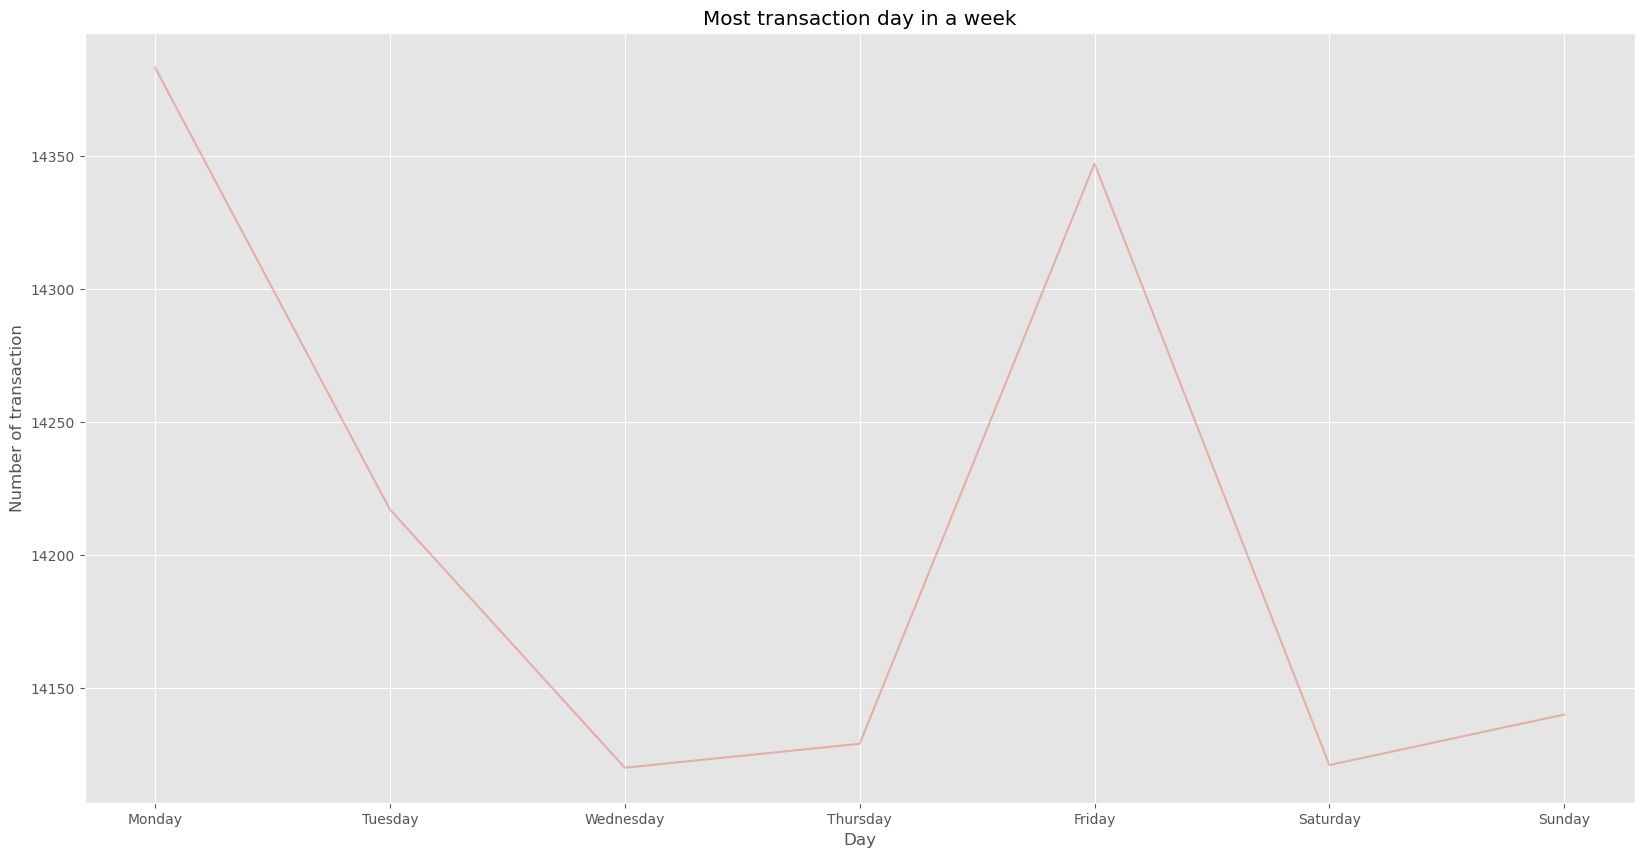

In [30]:
dw_mapping={
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday',
    5: 'Saturday', 
    6: 'Sunday'
} 

df_sorted_weekday = df.sort_values(['weekday'], ascending=True, axis=0, inplace=False)

ax = df_sorted_weekday['dayofweek'].value_counts()\
[df_sorted_weekday['dayofweek'].unique()]\
.plot(kind='line',figsize=(20,10),alpha=0.35)

ax.set_title('Most transaction day in a week')
ax.set_ylabel('Number of transaction')
ax.set_xlabel('Day')

# 7.2. High and Low customers flow per DAY

# 8. Segmentation analysis to identify any patterns or differences in customer behavior based on demographics or purchasing behavior

# 8.1. Gender structure of Customers - Top 10 Max makes the most expensive purchases 

In [31]:
# for male customers
df_male = df[df['gender'] == 'Male']
top_10_male_sales = df_male.nlargest(10, 'sales')['sales']

# for female customers
df_female = df[df['gender'] == 'Female']
top_10_female_sales = df_female.nlargest(10, 'sales')['sales']

print('top_10_male_sales: $', round(top_10_male_sales, 2))
print('top_10_female_sales: $', round(top_10_female_sales, 2))

top_10_male_sales: $ invoice_date
2021-10-26    26250.0
2022-10-04    26250.0
2021-04-21    26250.0
2023-02-26    26250.0
2021-02-17    26250.0
2021-05-30    26250.0
2022-04-03    26250.0
2022-04-30    26250.0
2021-06-23    26250.0
2022-01-20    26250.0
Name: sales, dtype: float64
top_10_female_sales: $ invoice_date
2021-11-19    26250.0
2022-01-03    26250.0
2021-03-03    26250.0
2022-03-03    26250.0
2022-12-05    26250.0
2021-11-16    26250.0
2021-05-24    26250.0
2021-10-25    26250.0
2022-07-03    26250.0
2021-03-25    26250.0
Name: sales, dtype: float64


# 8.2. Malls - % Most Sales customers (distribution ATV)

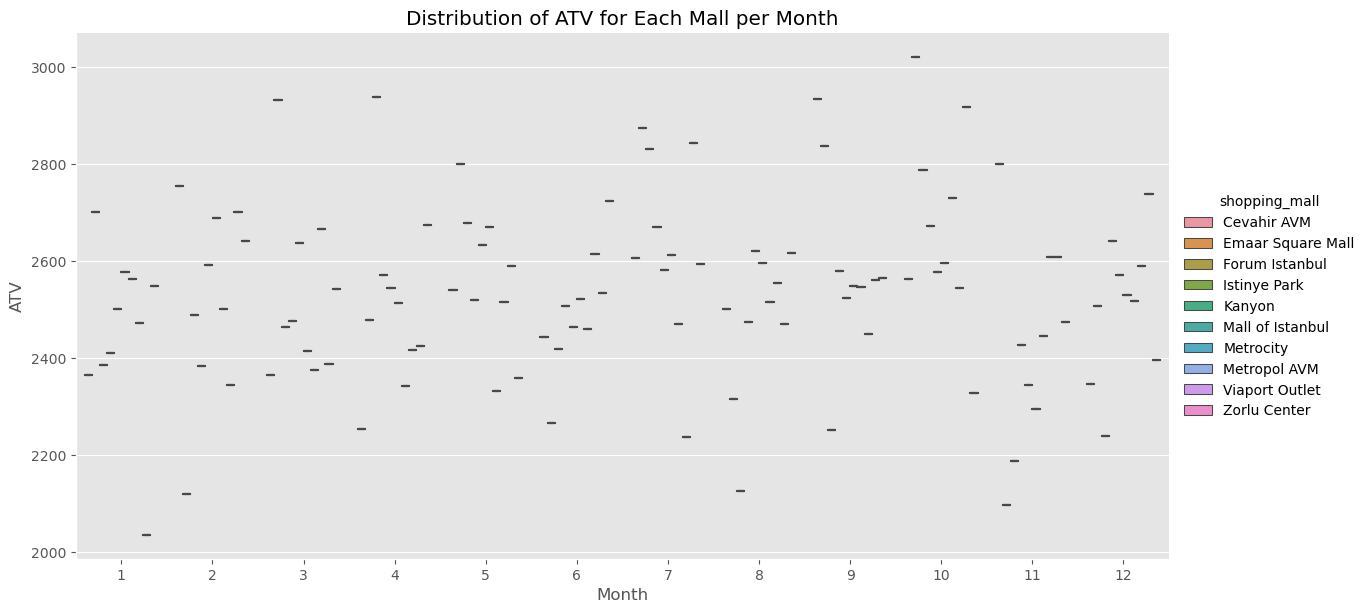

In [32]:

# group the data by shopping mall and month
mall_month_df = df.groupby(['shopping_mall', 'month']).agg(total_revenue=('sales', 'sum'), transactions=('invoice_no', 'count'))

# calculate the ATV for each mall and month
mall_month_df['ATV'] = mall_month_df['total_revenue'] / mall_month_df['transactions']

# reset the index to make the mall and month columns regular columns
mall_month_df = mall_month_df.reset_index()

# plot the distribution of ATV for each mall per month
sns.catplot(x='month', y='ATV', hue='shopping_mall', data=mall_month_df, kind='box', height=6, aspect=2)

# set the title and axis labels
plt.title('Distribution of ATV for Each Mall per Month')
plt.xlabel('Month')
plt.ylabel('ATV')

# show the plot
plt.show()

# 8.3. Payment method - Age and Sex Structure

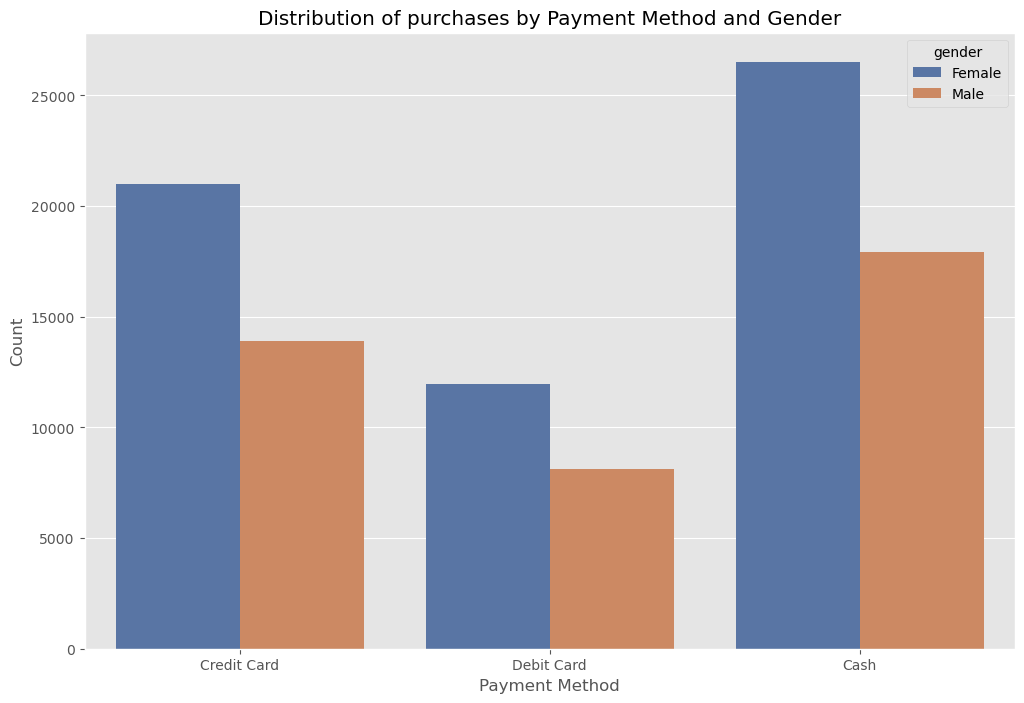

In [33]:
fig, ax = plt.subplots(figsize=(12, 8))

sns.countplot(data=df, x='payment_method', hue='gender', palette='deep', ax=ax)

ax.set_title('Distribution of purchases by Payment Method and Gender')
ax.set_xlabel('Payment Method')
ax.set_ylabel('Count')

plt.show()

# 9. t-tests and ANOVA

# 9.1. ANOVA Correlation between age and sales by gender

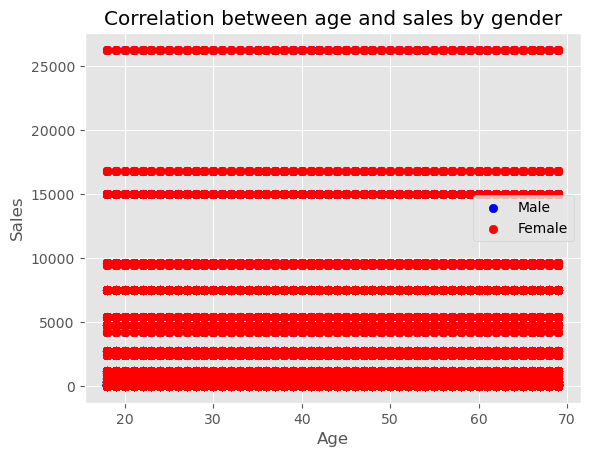

In [34]:
#we can create a scatter plot with age on the x-axis and sales on the y-axis. 
#we can use a different color for male and female customers to see if there is any difference in their spending patterns.

fig, ax = plt.subplots()

colors = {'Male':'blue', 'Female':'red'}
ax.scatter(df[df['gender']=='Male']['age'], df[df['gender']=='Male']['sales'], c='blue', label='Male')
ax.scatter(df[df['gender']=='Female']['age'], df[df['gender']=='Female']['sales'], c='red', label='Female')

ax.set_xlabel('Age')
ax.set_ylabel('Sales')
ax.set_title('Correlation between age and sales by gender')
ax.legend()

plt.show()